In [17]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [18]:
df = pd.read_csv('data/alturas-pesos-mils-train.csv')
le = LabelEncoder()
le.fit(df['Genero'])
df['Genero_enc'] = le.transform(df['Genero'])

In [46]:
def get_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'))
    model.summary()
    model.compile(optimizer='SGD', loss='binary_crossentropy')
    return model

In [47]:
def get_coefs(model):
    beta_p = model.weights[0].numpy()[0][0]
    beta_a = model.weights[0].numpy()[1][0]
    beta_0 = model.weights[1].numpy()[0]
    return beta_0, beta_p, beta_a

In [48]:
model = get_model()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


0.03554409 -5.6773343 2.4128213


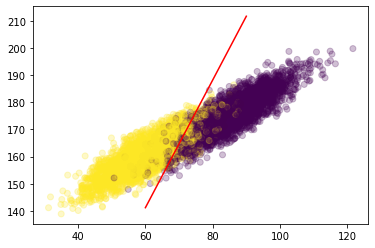

In [57]:
beta_0, beta_p, beta_a = get_coefs(model)
print(beta_0, beta_p, beta_a)

X_1 = np.linspace(60, 90, 100)
X_2 = (-beta_0 - beta_p * X_1)/beta_a

plt.scatter(df['Peso'], df['Altura'], c=df['Genero_enc'], alpha=0.25)

plt.plot(X_1, X_2, color='r')

In [56]:
model.fit(df[['Peso', 'Altura']], df[['Genero_enc']], epochs=1, verbose=0)